
Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


Lambda School Data Science, Unit 2: Predictive Modeling

# Define ML problems

- Choose a **target** to predict, and check its **distribution**
- Choose what data to hold out for your **test set**
- Choose an appropriate **evaluation metric**
- Avoid **leakage** of information from test to train or from target to features

### Setup

Run the code cell below. You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab.


In [1]:
# Three musketeers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extras
import pandas_profiling
import janitor

# Plotly imports
import plotly.express as px
import plotly.figure_factory as ff

In [3]:
# the basix
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [4]:
# the knew kidz - newer metrics
from sklearn.metrics import roc_auc_score, roc_curve

In [5]:
# the extras
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
# classifiers
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

## Today we're focused on the "first arrow" ...

#### Renee Teate, [Becoming a Data Scientist, PyData DC 2016 Talk](https://www.becomingadatascientist.com/2016/10/11/pydata-dc-2016-talk/)

![](https://image.slidesharecdn.com/becomingadatascientistadvice-pydatadc-shared-161012184823/95/becoming-a-data-scientist-advice-from-my-podcast-guests-55-638.jpg?cb=1476298295)


## For these kinds of questions ...

#### Brandon Rohrer, [Five Questions Data Science Answers](https://brohrer.github.io/five_questions_data_science_answers.html)

> - Is this A or B? (or C or ...)
> - How Much / How Many?


## Doing steps 1—3 in this workflow ...

#### Francois Chollet, [Deep Learning with Python](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/README.md), Chapter 4: Fundamentals of machine learning, "A universal workflow of machine learning"
 
> **1. Define the problem at hand and the data on which you’ll train.** Collect this data, or annotate it with labels if need be.

> **2. Choose how you’ll measure success on your problem.** Which metrics will you monitor on your validation data?

> **3. Determine your evaluation protocol:** hold-out validation? K-fold validation? Which portion of the data should you use for validation?

> **4. Develop a first model that does better than a basic baseline:** a model with statistical power.

> **5. Develop a model that overfits.** The universal tension in machine learning is between optimization and generalization; the ideal model is one that stands right at the border between underfitting and overfitting; between undercapacity and overcapacity. To figure out where this border lies, first you must cross it.

> **6. Regularize your model and tune its hyperparameters, based on performance on the validation data.** Repeatedly modify your model, train it, evaluate on your validation data (not the test data, at this point), modify it again, and repeat, until the model is as good as it can get. 

> **Iterate on feature engineering: add new features, or remove features that don’t seem to be informative.** Once you’ve developed a satisfactory model configuration, you can train your final production model on all the available data (training and validation) and evaluate it one last time on the test set.


## It's not easy! 

This opinionated blog post explains:

#### [Data Science Is Not Taught At Universities - And Here Is Why](https://www.linkedin.com/pulse/data-science-taught-universities-here-why-maciej-wasiak/)

> The tables they use in machine learning research already have the target information clearly defined. Here comes the famous IRIS dataset, then the Wisconsin Breast Cancer, there is even Credit Risk or Telco Churn data and they all have the **Target** column there ...

> The problem is that in real life the **Target** flag is NEVER there.

> For churn modelling you may have many churn types on the system and need to distil the few that need modelling. And hey - when a subscriber moves from Postpaid contract to Prepaid – is this a churn or not? (‘Yes’ – says the Postpaid Base Manager, ‘No’ says the CEO ). You have to make the call ...

> Your source will be a database with tens or hundreds of **tables**, millions of records, usually after 3 painful migrations with gaps in history, columns without descriptions ...

> Flooded by **leaks from the future**, ...a dozen of other traps ... And you need to disarm all of them, because even one left behind may result in a completely useless model. 

> These are the skills employers are looking for.


# Choose a target to predict, and check its distribution


## Regression, Binary Classification, or Multi-Class Classification? It's up to you!



#### You can convert problems from regression to classification

1. UCI, [Adult Census Income dataset](https://archive.ics.uci.edu/ml/datasets/adult)

2. DS5 student Han Lee, [Bitcoin Price Prediction app](https://dry-shore-97069.herokuapp.com/about):

> We also cared a lot more about the direction of returns instead of magnitude of returns. A trade placed based on the prediction that the price to go up tomorrow will be fine if the magnitude is off but will be unprofitable if the direction is wrong. ... Yesterday's return is unsurprising a great predictor for today's return, but has a poor directional accuracy.



#### You can convert problems from classification to regression

Brandon Rohrer, [What questions can machine learning answer](https://brohrer.github.io/five_questions_data_science_answers.html)

> Sometimes questions that look like multi-value classification questions are actually better suited to regression. For instance, “Which news story is the most interesting to this reader?” appears to ask for a category—a single item from the list of news stories. However, you can reformulate it to “How interesting is each story on this list to this reader?” and give each article a numerical score. Then it is a simple thing to identify the highest-scoring article. Questions of this type often occur as rankings or comparisons.

> “Which van in my fleet needs servicing the most?” can be rephrased as “How badly does each van in my fleet need servicing?” 
“Which 5% of my customers will leave my business for a competitor in the next year?” can be rephrased as “How likely is each of my customers to leave my business for a competitor in the next year?” 

> Binary classification problems can also be reformulated as regression. (In fact, under the hood some algorithms reformulate every binary classification as regression.) This is especially helpful when an example can belong part A and part B, or have a chance of going either way. When an answer can be partly yes and no, probably on but possibly off, then regression can reflect that. Questions of this type often begin “How likely…” or “What fraction…”

> How likely is this user to click on my ad? What fraction of pulls on this slot machine result in payout? How likely is this employee to be an insider security threat? What fraction of today’s flights will depart on time?

We'll see examples of this, using predicted probabilities instead of discrete predictions, with Tanzania Waterpumps and Lending Club data.



#### You can convert multi-class classification to binary classification

By omitting or combining some classes. We'll also see examples of this, with Tanzania Waterpumps and Lending Club data.


## Classification problems with imbalanced classes

[Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/) gives "a rough outline of useful approaches" : 

- Do nothing. Sometimes you get lucky and nothing needs to be done. You can train on the so-called natural (or stratified) distribution and sometimes it works without need for modification.
- Balance the training set in some way:
  - Oversample the minority class.
  - Undersample the majority class.
  - Synthesize new minority classes.
- Throw away minority examples and switch to an anomaly detection framework.
- At the algorithm level, or after it:
  - Adjust the class weight (misclassification costs).
  - Adjust the decision threshold.
  - Modify an existing algorithm to be more sensitive to rare classes.
- Construct an entirely new algorithm to perform well on imbalanced data.

#### Technical implementations:

- "Adjust the class weight (misclassification costs)" — many scikit-learn classifiers have a `class_balance` parameter
- "Adjust the decision threshold" — we did this last week. You can lean more about it in a great blog post, [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415).
- "Oversample the minority class, undersample the majority class, or synthesize new minority classes" — the [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library can be used for this.


## Regression problems with right-skewed targets

#### Terence Parr & Jeremy Howard, [The Mechanics of Machine Learning, Chapter 5.5](https://mlbook.explained.ai/prep.html#logtarget)

> Transforming the target variable (using the mathematical log function) into a tighter, more uniform space makes life easier for any model.

> The only problem is that, while easy to execute, understanding why taking the log of the target variable works and how it affects the training/testing process is intellectually challenging. You can skip this section for now, if you like, but just remember that this technique exists and check back here if needed in the future.

> Optimally, the distribution of prices would be a narrow “bell curve” distribution without a tail. This would make predictions based upon average prices more accurate. We need a mathematical operation that transforms the widely-distributed target prices into a new space. The “price in dollars space” has a long right tail because of outliers and we want to squeeze that space into a new space that is normally distributed (“bell curved”). More specifically, we need to shrink large values a lot and smaller values a little. That magic operation is called the logarithm or log for short. 

> To make actual predictions, we have to take the exp of model predictions to get prices in dollars instead of log dollars.


# Choose what data to hold out for your test set
 
#### Rachel Thomas, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)

# Choose an appropriate evaluation metric

https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values

Do not only use accuracy score when classes are imbalanced.

Consider custom evaluation metrics:

- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)


# Avoid leakage of information from test to train or from target to features

[Xavier Amatriain recommends,](https://www.quora.com/What-are-some-best-practices-for-training-machine-learning-models/answer/Xavier-Amatriain)

"Make sure your training features do not contain data from the “future” (aka time traveling). While this might be easy and obvious in some cases, it can get tricky. ... If your test metric becomes really good all of the sudden, ask yourself what you might be doing wrong. Chances are you are time travelling or overfitting in some way."


---

# 1. Bank Marketing 🏦

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing


## Choose a target to predict, and check its distribution


In [2]:
import os

DATA_PATH = "/Users/Tobias/workshop/dasci/sprints/07-Applied_Modeling/DS-Unit-2-Applied-Modeling/data"

In [ ]:
BANK_PATH = os.path.join(DATA_PATH, "bank-marketing/bank-additional-full.csv")

print(BANK_PATH)

In [7]:
df = pd.read_csv(BANK_PATH, sep=";")

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
# Convert y to Bool
y = df['y'] == 'yes'
X = df.drop(columns='y')

In [10]:
# Explore distribution
y.describe()

count     41188
unique        2
top       False
freq      36548
Name: y, dtype: object

In [11]:
y.value_counts()

False    36548
True      4640
Name: y, dtype: int64

In [12]:
y.value_counts(normalize=True)

False    0.887346
True     0.112654
Name: y, dtype: float64

## Choose what data to hold out for your test set


In [18]:
# sklearn aka the skool kidz - the basix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [14]:
# Split up into train, test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
y_train.value_counts(normalize=True)

False    0.887344
True     0.112656
Name: y, dtype: float64

In [16]:
y_test.value_counts(normalize=True)

False    0.887351
True     0.112649
Name: y, dtype: float64

## Choose an appropriate evaluation metric


In [20]:
# the knew kidz - newer metrics
from sklearn.metrics import roc_auc_score

In [21]:
from sklearn.metrics import precision_score, recall_score

In [17]:
# Maj class bassline
y_pred_bass = [False] * len(y_test)

In [19]:
accuracy_score(y_test, y_pred_bass)

0.8873512988589464

In [23]:
# Not a good metric
precision_score(y_test, y_pred_bass)

/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.



0.0

In [24]:
# Not a good metric
recall_score(y_test, y_pred_bass)

0.0

In [25]:
roc_auc_score(y_test, y_pred_bass)

0.5

## Avoid leakage of information from test to train or from target to features



In [28]:
# Not sure what he was trying to do with these lines
df["nonzero_duration"] = df["duration"] > 0
df["nonzero_duration"].value_counts()

In [31]:
# sklearn aka the skool kidz
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Define the pipeline
pipe = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=2),
)

In [33]:
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print('Validation ROC AUC:', scores)

Validation ROC AUC: [0.85309963 0.86704028 0.85589586 0.85229795 0.86402673]


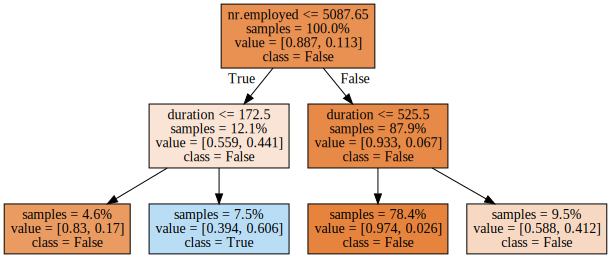

In [35]:
import graphviz
from sklearn.tree import export_graphviz

pipe.fit(X_train, y_train)
tree = pipe.named_steps['decisiontreeclassifier']
encoder = pipe.named_steps['onehotencoder']
feature_names = encoder.transform(X_train).columns
feature_names[tree.feature_importances_ > 0]

dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=feature_names, class_names=['False', 'True'], 
                           filled=True, impurity=False, proportion=True)

graphviz.Source(dot_data)

### When the `duration` feature is dropped

The ROC AUC score drops from ~0.85 to ~0.75

In [36]:
X_train = X_train.drop(columns='duration')
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc')
print('Validation ROC AUC:', scores)

Validation ROC AUC: [0.75192356 0.73669375 0.7473569  0.73692904 0.74700667]


### ROC AUC

[Wikipedia explains,](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) "A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings."

ROC AUC is the area under the ROC curve. [It can be interpreted](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) as "the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative." 

ROC AUC measures how well a classifier ranks predicted probabilities. It ranges from 0 to 1. A naive majority class baseline will have an ROC AUC score of 0.5. 


Area under the Receiver Operating Characteristic curve: 0.7404622305997627


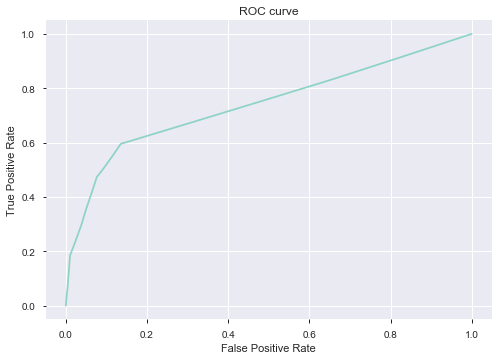

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(pipe, X_train, y_train, cv=5, n_jobs=-1, 
                                 method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train, y_pred_proba))

In [38]:
true_false_pos = pd.DataFrame({'False Positive Rate': fpr, 
              'True Positive Rate': tpr, 
              'Threshold': thresholds})

true_false_pos.head()

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.714088
1,0.001847,0.034752,0.714088
2,0.004344,0.068966,0.709202
3,0.006225,0.107220,0.693569
4,0.008174,0.143588,0.692588


---

# 2. Caterpillar tube pricing problem 🚜

#### [Description](https://www.kaggle.com/c/caterpillar-tube-pricing/overview/description)

> Like snowflakes, it's difficult to find two tubes in Caterpillar's diverse catalogue of machinery that are exactly alike. Tubes can vary across a number of dimensions, including base materials, number of bends, bend radius, bolt patterns, and end types.

> Currently, Caterpillar relies on a variety of suppliers to manufacture these tube assemblies, each having their own unique pricing model. This competition provides detailed tube, component, and annual volume datasets, and challenges you to predict the price a supplier will quote for a given tube assembly. 

#### [Data Description](https://www.kaggle.com/c/caterpillar-tube-pricing/data)

> The dataset is comprised of a large number of relational tables that describe the physical properties of tube assemblies. You are challenged to combine the characteristics of each tube assembly with supplier pricing dynamics in order to forecast a quote price for each tube. The quote price is labeled as cost in the data.




## Choose a target to predict, and check its distribution


In [39]:
# Read in data
CAT_PATH = os.path.join(DATA_PATH, "caterpillar-tube-pricing/train_set.csv")

df = pd.read_csv(CAT_PATH)

In [40]:
df.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [41]:
df["cost"].describe()

count    30213.000000
mean        13.433317
std         28.663200
min          0.503553
25%          3.878190
50%          6.521146
75%         13.431781
max       1000.000000
Name: cost, dtype: float64

In [ ]:
# TODO: copy over the rest of the cat exercise

## Choose what data to hold out for your test set


## Choose an appropriate evaluation metric


## Avoid leakage of information from test to train or from target to features



---

# 3. Lending Club 🏦

### Background

[According to Wikipedia,](https://en.wikipedia.org/wiki/Lending_Club)

> Lending Club is the world's largest peer-to-peer lending platform. Lending Club enables borrowers to create unsecured personal loans between \$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

[Lending Club says,](https://www.lendingclub.com/) "Our mission is to transform the banking system to make credit more affordable and investing more rewarding." You can view their [loan statistics and visualizations](https://www.lendingclub.com/info/demand-and-credit-profile.action).

Lending Club's [Investor Education Center](https://www.lendingclub.com/investing/investor-education) can help you grow your domain expertise. The article about [Benefits of diversification](https://www.lendingclub.com/investing/investor-education/benefits-of-diversification) explains,

> With the investment minimum of \$1,000, you can get up to 40 Notes at \$25 each.

![](https://i.ibb.co/B37q8LB/www-lendingclub-com-browse-browse-action-1.png)

### Data sources
- [Current loans](https://www.lendingclub.com/browse/browse.action)
- [Data Dictionary & Historical loans](https://www.lendingclub.com/info/download-data.action) (17 zip files, 450 MB total)

### What questions could we ask with this data?
1. Can we predict the interest rate that Lending Club will assign to a loan, to reverse engineer their formula. (Regression problem. Can only use info from before the interest rate was assigned)
2. Can we predict whether a loan will be fully paid or charged off, to choose which loans to invest in. (Classification problem. Can only use info available at the time you choose loans, from loans that have been fully paid or charged off.)

[Here's a Plotly Dash app for #1](https://rrherr-project2-example.herokuapp.com/).

This notebook will work on #2.

### Use a subset of Loan Status

#### [Data-Driven Investment Strategies for Peer-to-Peer Lending: A Case Study for Teaching Data Science](https://www.liebertpub.com/doi/full/10.1089/big.2018.0092)

> Current refers to a loan that is still being reimbursed in a timely manner. Late corresponds to a loan on which a payment is between 16 and 120 days overdue. If the payment is delayed by more than 121 days, the loan is considered to be in Default. If LendingClub has decided that the loan will not be paid off, then it is given the status of Charged-Off.

> These dynamics imply that 5 months after the term of each loan has ended, every loan ends in one of two LendingClub states—fully paid or charged-off. We call these two statuses fully paid and defaulted, respectively, and we refer to a loan that has reached one of these statuses as expired.

> **One way to simplify the problem is to consider only loans that have expired at the time of analysis.**

> A significant portion (13.5%) of loans ended in Default status; depending on how much of the loan was paid back, these loans
might have resulted in a significant loss to investors who had invested in them. The remainder was Fully Paid—the borrower fully reimbursed the loan’s outstanding balance with interest, and the investor earned a positive return on his or her investment. Therefore, to avoid unsuccessful investments, our goal is to estimate which loans are more likely to default and which will yield low returns. 

### Use a subset of Loan Grade

[Lending Club announced,](https://blog.lendingclub.com/q1-2019-platform-update) 

> We periodically adjust platform products to reflect changes in investor demand and other marketplace factors. As a result, this quarter we are retiring Grade E loans. As of May 7, 2019, we will no longer facilitate new Grade E loans except for certain previously qualified or approved loans; **effective July 1, 2019, no grade E loans will be available on the platform.**


## Choose a target to predict, and check its distribution


## Choose what data to hold out for your test set


## Choose an appropriate evaluation metric


## Avoid leakage of information from test to train or from target to features


